In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:

data = {
    'ticket_id': [1, 2, 3, 4, 5],
    'usuario_id': ['U001', 'U002', 'U001', 'U003', 'U004'],
    'fecha_creacion': ['2025-06-20', '2025-06-20', '2025-06-21', '2025-06-22', '2025-06-23'],
    'fecha_cierre': ['2025-06-21', '2025-06-22', '2025-06-21', '2025-06-24', '2025-06-25'],
    'tipo_ticket': ['Login', 'Pago', 'App caída', 'Consulta', 'Login'],
    'canal': ['Chat', 'Correo', 'Teléfono', 'Formulario', 'Chat'],
    'tiempo_respuesta_min': [10, 180, 30, 240, 15],
    'resuelto': ['Sí', 'No', 'Sí', 'Sí', 'Sí'],
    'csat': [5, 2, 4, 3, 5],
    'comentarios_usuario': [
        'Todo bien, rápido.',
        'Tardaron y no resolvieron nada.',
        'Me atendieron bien, aunque tardó un poco.',
        'Un poco lenta la atención.',
        'Excelente atención.'
    ]
}

df_tickets = pd.DataFrame(data)
df_tickets['fecha_creacion'] = pd.to_datetime(df_tickets['fecha_creacion'])
df_tickets['fecha_cierre'] = pd.to_datetime(df_tickets['fecha_cierre'])
df_tickets.head()

,ticket_id,usuario_id,fecha_creacion,fecha_cierre,tipo_ticket,canal,tiempo_respuesta_min,resuelto,csat,comentarios_usuario
0,1,U001,2025-06-20,2025-06-21,Login,Chat,10,Sí,5,"Todo bien, rápido."
1,2,U002,2025-06-20,2025-06-22,Pago,Correo,180,No,2,Tardaron y no resolvieron nada.
2,3,U001,2025-06-21,2025-06-21,App caída,Teléfono,30,Sí,4,"Me atendieron bien, aunque tardó un poco."
3,4,U003,2025-06-22,2025-06-24,Consulta,Formulario,240,Sí,3,Un poco lenta la atención.
4,5,U004,2025-06-23,2025-06-25,Login,Chat,15,Sí,5,Excelente atención.


In [6]:
#observacion de los datos
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ticket_id             5 non-null      int64         
 1   usuario_id            5 non-null      object        
 2   fecha_creacion        5 non-null      datetime64[ns]
 3   fecha_cierre          5 non-null      datetime64[ns]
 4   tipo_ticket           5 non-null      object        
 5   canal                 5 non-null      object        
 6   tiempo_respuesta_min  5 non-null      int64         
 7   resuelto              5 non-null      object        
 8   csat                  5 non-null      int64         
 9   comentarios_usuario   5 non-null      object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 532.0+ bytes


In [7]:
#tiempo promedio en resolucion en días de tickets, se va  a proceder a restar fecha de creacion a fecha de cierre, se creará la columna tiempo de resolucion

df_tickets['df_resolucion'] = (df_tickets['fecha_cierre'] - df_tickets['fecha_creacion']).dt.days
df_tickets.head()

,ticket_id,usuario_id,fecha_creacion,fecha_cierre,tipo_ticket,canal,tiempo_respuesta_min,resuelto,csat,comentarios_usuario,df_resolucion
0,1,U001,2025-06-20,2025-06-21,Login,Chat,10,Sí,5,"Todo bien, rápido.",1
1,2,U002,2025-06-20,2025-06-22,Pago,Correo,180,No,2,Tardaron y no resolvieron nada.,2
2,3,U001,2025-06-21,2025-06-21,App caída,Teléfono,30,Sí,4,"Me atendieron bien, aunque tardó un poco.",0
3,4,U003,2025-06-22,2025-06-24,Consulta,Formulario,240,Sí,3,Un poco lenta la atención.,2
4,5,U004,2025-06-23,2025-06-25,Login,Chat,15,Sí,5,Excelente atención.,2


In [10]:
#para conocer el tiempo promedio

df_promedio_resolucion = df_tickets['df_resolucion'].mean()
print(f'tiempo de dias en resolucion: {df_promedio_resolucion}')

tiempo de dias en resolucion: 1.4


In [12]:
#canal con mejor satisfaccion promedio

df_canal_csat = df_tickets.groupby('canal')['csat'].mean().reset_index()
df_canal_csat.sort_values(by='csat', ascending=False, inplace=True)
print(df_canal_csat.head())

        canal  csat
0        Chat   5.0
3    Teléfono   4.0
2  Formulario   3.0
1      Correo   2.0


In [15]:
#porcentaje de tickets que no fueron resueltos

no_resueltos = df_tickets[df_tickets['resuelto'] == 'No'].shape[0]
total_tickets = df_tickets.shape[0]
porcentaje = (no_resueltos / total_tickets) * 100
print(f"Porcentaje de tickets no resueltos: {porcentaje:.2f}%")

Porcentaje de tickets no resueltos: 20.00%


In [31]:
#clasificacion del nivel de satisfaccion

def clasificar_csat(score):
    if score >= 4:
        return 'Alta'
    elif score == 3:
        return 'Media'
    else:
        return 'Baja'


df_tickets['nivel_satisfaccion'] = df_tickets['csat'].apply(clasificar_csat)
df_tickets[['ticket_id', 'csat', 'nivel_satisfaccion', 'canal', 'resuelto']]

,ticket_id,csat,nivel_satisfaccion,canal,resuelto
0,1,5,Alta,Chat,Sí
1,2,2,Baja,Correo,No
2,3,4,Alta,Teléfono,Sí
3,4,3,Media,Formulario,Sí
4,5,5,Alta,Chat,Sí


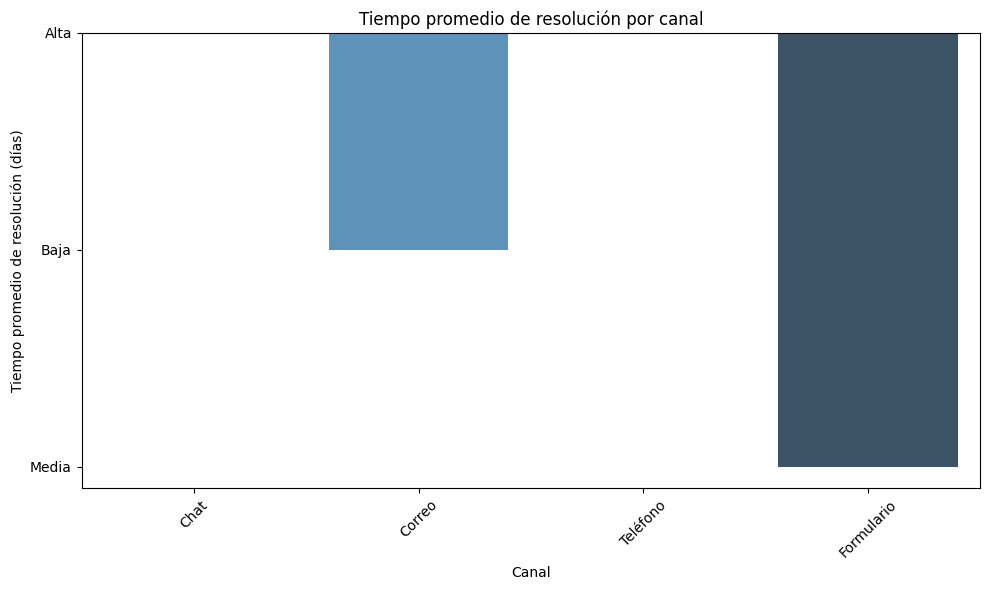

In [30]:


# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='canal', y='nivel_satisfaccion', data=df_tickets, palette='Blues_d')
plt.xlabel("Canal")
plt.ylabel("Tiempo promedio de resolución (días)")
plt.title("Tiempo promedio de resolución por canal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AREAS DE MEJORA

Se puede observar que los canales donde hay mayor área de oportunidad para poder fomentar una buena comunicación con los clientes es en formulario y correo, se ha observado que los clientes que solicitan atención por el medio de correo muchas veces no son atendidas y es en donde se le ha dado un puntaje menor e incluso se ha catalogado como "ticket no resuelto"

Además, el tiempo de respuesta es el más alto (180 min). Mi recomendación sería revisar ese canal: automatizar respuestas, reasignar prioridades o capacitar a los agentes


```
# Tiene formato de código
```

